# Models
***

## Exercise 2.1  
Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

NOTE: mostly used Ian's example with few tweaks when working through this exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)

First, let's simulate some data as per Ian's example.

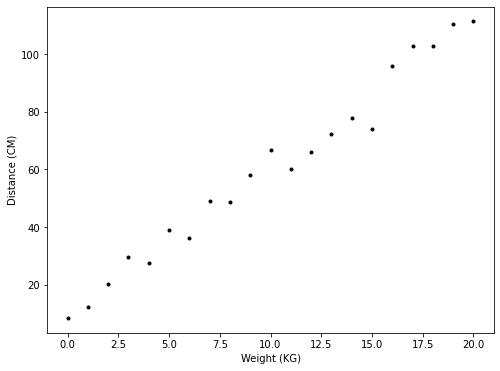

In [2]:
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

# plotting the data
plt.plot(w, d, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

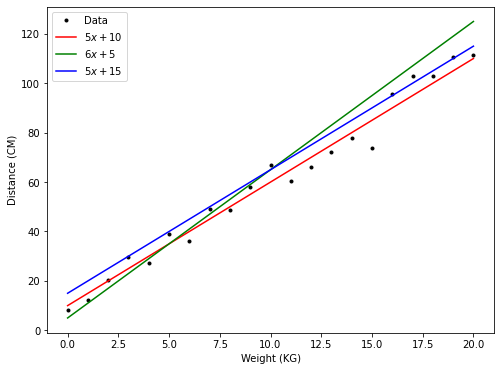

In [3]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

The absolute value function uses the following formula:  
$\mid y_i - m x_i - c \mid$

In [6]:
# Calculate the absolute value for the data above
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c) for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, abs(cost(5.0, 10.0))))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, abs(cost(6.0,  5.0))))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, abs(cost(5.0, 15.0))))

Cost with m =  5.00 and c = 10.00:     9.56
Cost with m =  6.00 and c =  5.00:    95.44
Cost with m =  5.00 and c = 15.00:    95.44


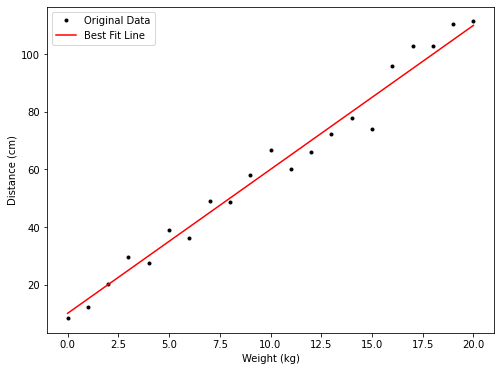

In [14]:
# Plot the best fit line

# Setting values for m & c based on above calculations
m, c = 5.0, 10.0

plt.plot(w, d, 'k.', label='Original Data')
plt.plot(w, m * w + c, 'r-', label='Best Fit Line')

# Add axis labels and legend
plt.xlabel('Weight (kg)')
plt.ylabel('Distance (cm)')
plt.legend()

# Show the plot
plt.show()

## Why is absolute value function not typically used in fitting straight lines to data?

According to https://www.bradthiessen.com/html5/docs/ols.pdf:  
Mathematical difficulties: When we do not square all the values in the numerator, the positive and negative values cancel each other out and we’re always left with a value of 0, especially when using a normal distribution

From https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia:  
"I suppose you could say that absolute difference assigns equal weight to the spread of data whereas squaring emphasises the extremes. Technically though, as others have pointed out, squaring makes the algebra much easier to work with and offers properties that the absolute method does not (for example, the variance is equal to the expected value of the square of the distribution minus the square of the mean of the distribution)"

From https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia:  
"Having a square as opposed to the absolute value function gives a nice continuous and differentiable function (absolute value is not differentiable at 0) - which makes it the natural choice, especially in the context of estimation and regression analysis."